<a href="https://colab.research.google.com/github/AnusreeMandal/SoftComputing_Lab/blob/main/Neural_Networks_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: Download the benchmark data Breast Cancer Wisconsin Dataset.
Dividing the data: Split the dataset into Training (70%) and Testing (30%).
Initialization of Weights and Bias: Initialize weights and biases randomly.

Activation Function: Use the sigmoid activation function

Learning Rate: Set the learning rate, mu
 = 0.001.

Tasks (to be performed):

1. Forward Propagation:
• Perform forward propagation by passing the inputs through the network layers using the
initialized weights and biases. Compute the output at the hidden and output layers using the
activation function.
2. Error Calculation:
• Calculate the error for each training instance using the error formula mentioned above. The error
will help track how far the predicted output is from the actual target output.

3. Backpropagation (Weight and Bias Updates):
• Update the weights and biases of the neural network using backpropagation to minimize the error.
• Perform backpropagation by calculating the gradients of the error with respect to the weights and
biases.
4. Weight and Bias Updates:
• Display the updated weights and biases for the 2nd iteration. Continue this process iteratively
until convergence is achieved.
5. Plot Error vs. Epoch Curve:
• Plot the graph of error vs. the number of epochs to visualize the learning progress of the neural
network.
6. Cross-Validation and Confusion Matrix:
• Use cross-validation to assess the model’s performance and generate a confusion matrix. The
confusion matrix will provide insights into the number of true positives, false positives, true
negatives, and false negatives.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('breast-cancer.data')

In [ ]:
df.columns = [
    'Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
    'deg-malig', 'breast', 'breast-quad', 'irradiat'
]

In [ ]:
print(df.head())

                  Class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  40-49   premeno      20-24       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  60-69      ge40      15-19       0-2        no   
3  no-recurrence-events  40-49   premeno        0-4       0-2        no   
4  no-recurrence-events  60-69      ge40      15-19       0-2        no   

   deg-malig breast breast-quad irradiat  
0          2  right    right_up       no  
1          2   left    left_low       no  
2          2  right     left_up       no  
3          2  right   right_low       no  
4          2   left    left_low       no  


In [ ]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False])

no column has null values. Every column is labelled and uci ml website for column names

In [ ]:
df.describe()

,deg-malig
count,285.000000
mean,2.045614
std,0.737351
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
# Now the categorical columns are converted to numerical values
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Label encode the 'Class' column
df['Class'] = le.fit_transform(df['Class'])

# Label encode multiple categorical columns
categorical_columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df
#pre-processing done

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,2,2,3,0,1,2,1,5,0
1,0,2,2,3,0,1,2,0,2,0
2,0,4,0,2,0,1,2,1,3,0
3,0,2,2,0,0,1,2,1,4,0
4,0,4,0,2,0,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...
280,1,1,2,5,0,1,2,0,3,0
281,1,1,2,3,0,1,3,0,3,1
282,1,4,0,3,0,1,1,1,3,0
283,1,2,0,5,4,1,3,0,2,0


In [ ]:
#2. Split the data into training (70%) and testing (30%) sets
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# Initialize weights and biases randomly
input_size = X_train.shape[1]
hidden_size = 25  # You can adjust this
output_size = 1  # Assuming binary classification

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1,hidden_size))

W2 = np.random.randn(hidden_size, output_size)*0.01
b2 = np.zeros((1, output_size))


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use the same scaler fitted on training data

In [ ]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Derivative of the sigmoid function (for backpropagation)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [ ]:
input_size = X_train.shape[1]
hidden_size = 50  # Increased hidden size
output_size = 1

In [ ]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1  # Linear combination for hidden layer
    A1 = sigmoid(Z1)  # Activation function for hidden layer
    Z2 = np.dot(A1, W2) + b2  # Linear combination for output layer
    A2 = sigmoid(Z2)  # Activation function for output layer
    return Z1, A1, Z2, A2

In [ ]:
def compute_error(y_true, y_pred):
    m = y_true.shape[0]
    error = (1 / (2*m)) * np.sum((y_pred - y_true) ** 2)
    return error

In [ ]:
def backpropagation(X, y, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate):
    m = X.shape[0]

    # Derivatives for output layer
    dZ2 = A2 - y
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

    # Derivatives for hidden layer
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

In [ ]:
def train(X, y, W1, b1, W2, b2, learning_rate, epochs):
    errors = []
    for epoch in range(epochs):
        # Forward Propagation
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

        # Error calculation
        error = compute_error(y, A2)
        errors.append(error)

        # Backpropagation
        W1, b1, W2, b2 = backpropagation(X, y, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate)

        # Print progress every 1000 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Error: {error}')

    return W1, b1, W2, b2, errors

In [ ]:
epochs = 1000
learning_rate = 0.001

# Train the model
W1, b1, W2, b2, errors = train(X_train, y_train, W1, b1, W2, b2, learning_rate, epochs)

Epoch 0, Error: 0.08860667711050696
Epoch 100, Error: 0.08847391226944658
Epoch 200, Error: 0.08836317840811816
Epoch 300, Error: 0.08827051929666153
Epoch 400, Error: 0.08819263929685173
Epoch 500, Error: 0.08812681147727792
Epoch 600, Error: 0.08807079230151463
Epoch 700, Error: 0.08802274475511285
Epoch 800, Error: 0.08798117065135051
Epoch 900, Error: 0.08794485209329277


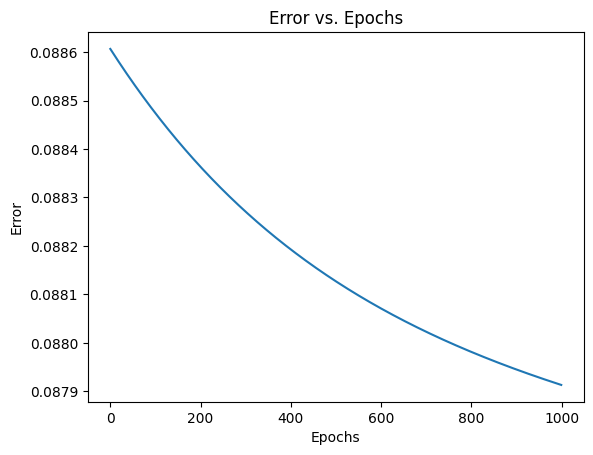

In [ ]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.title("Error vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize KFold with desired number of splits (e.g., 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store predictions and true labels for confusion matrix
all_predictions = []
all_true_labels = []

# Iterate through folds
for train_index, test_index in kfold.split(X):

    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Convert y_train_fold and y_test_fold to NumPy arrays and reshape
    y_train_fold = np.array(y_train_fold).reshape(-1, 1)
    y_test_fold = np.array(y_test_fold).reshape(-1, 1)


    # Train your model on the training fold (using your train function)
    W1, b1, W2, b2, _ = train(X_train_fold, y_train_fold, W1, b1, W2, b2, learning_rate, epochs)

    # Make predictions on the test fold
    _, _, _, predictions = forward_propagation(X_test_fold, W1, b1, W2, b2)
    predicted_labels = (predictions >= 0.5).astype(int)  # Assuming binary classification threshold of 0.5

    # Store predictions and true labels
    all_predictions.extend(predicted_labels.flatten())
    all_true_labels.extend(y_test_fold.flatten()) # Flatten y_test_fold as well

# Generate confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)

# Display confusion matrix and accuracy
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy}")

Epoch 0, Error: 0.11979167606234176
Epoch 100, Error: 0.11252446172444809
Epoch 200, Error: 0.10690541478669865
Epoch 300, Error: 0.1025968789433702
Epoch 400, Error: 0.09931138698723685
Epoch 500, Error: 0.09681462755770769
Epoch 600, Error: 0.09492091291085991
Epoch 700, Error: 0.09348579255524672
Epoch 800, Error: 0.09239826506709592
Epoch 900, Error: 0.09157371207038528
Epoch 0, Error: 0.09080790285795289
Epoch 100, Error: 0.09053150965537832
Epoch 200, Error: 0.09032474517739054
Epoch 300, Error: 0.09017020935755349
Epoch 400, Error: 0.09005481151799159
Epoch 500, Error: 0.08996870590825401
Epoch 600, Error: 0.08990448918520669
Epoch 700, Error: 0.08985659628086934
Epoch 800, Error: 0.08982084591018756
Epoch 900, Error: 0.08979409868040093
Epoch 0, Error: 0.0901158826804298
Epoch 100, Error: 0.09008573347813446
Epoch 200, Error: 0.09006218295229589
Epoch 300, Error: 0.09004357926740211
Epoch 400, Error: 0.0900286726361365
Epoch 500, Error: 0.09001651836372225
Epoch 600, Error: 0.0

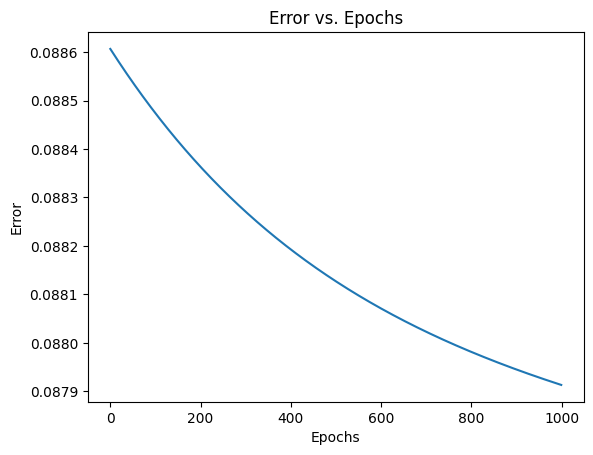

In [ ]:
plt.plot(errors)
plt.title("Error vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

